# Spin-1/2 Non-Abelian Geometric Phase via Floquet Engineering

In [5]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

$$ \hat{\mathcal{H}} = \tilde{\Omega}\left( \sin\phi \hat{F}_x + \cos\phi \hat{F}_y \right) + \tilde{\delta} \hat{F}_z $$
Recall the minus plus sign in front of $\tilde{\delta}$ here, should probably be a minus.

$$ \tilde{\Omega} = \Omega_0 \sin\Omega t \cos\omega t $$
$$ \tilde{\delta} = \Omega_0 \cos\Omega t \cos\omega t $$

$$ \hat{\mathcal{H}}\left( t \right) = \Omega_0 \vec{r} \cdot \hat{\vec{\sigma}} \cos\omega t$$

$$ \vec{r} = \left( \sin\Omega t \cos \Phi, \sin\Omega t \sin \Phi, \cos\Omega t \right)^T $$

In [6]:
#----- Input Parameters -----
Omega0 = 2*np.pi * 1 #Rabi frequency
Phi = 0 #Operator phase
n_cyc = 10 #Number of Rabi oscillations per op.

#--- Computed Values ---
delta = Omega0 #Field detuning
slow_f = (1/n_cyc)*Omega0 #Slow freq.
floq_f = 2*Omega0 #Floquet freq.

#--- Setup Evolution ---
periods = 4 #Number of periods of slow_f to simulate over
t = np.linspace(0, periods*(2*np.pi/slow_f), num=5000) #Time axis

#--- Initial States ---
psi1, psi2 = qt.basis(2,0), qt.basis(2,1) #Two-level basis states
psi = psi1 #Initial state
psi = psi.unit() #Force normalization

#----- Global Settings -----
sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()

#--- Projection Operators ---
p1, p2 = psi1.proj(), psi2.proj() #Project onto bare spins (z-basis)
eigx, eigy = sx.eigenstates(), sy.eigenstates() #eigenstates of sx, sy
px1, px2 = eigx[1][0].proj(), eigx[1][1].proj() #Corresponding proj. ops.
py1, py2 = eigy[1][0].proj(), eigy[1][1].proj() #Corresponding proj. ops.

In [7]:
#----- Time-Dependent Operators -----
H0 = (Omega0) * (np.sin(Phi)*sx + np.cos(Phi)*sy) #Coupling term coefficient
H1 = delta*sz #Detuning term coefficient

def coeff0_t(t, args):
    ''' Time-dependent coefficient of H1 '''
    w = args['floq_f'] #Floquet freq.
    Om = args['slow_f'] #Adiabatic freq.
    return np.cos(w*t)*np.sin(Om*t)

def coeff1_t(t, args):
    ''' Time-dependent coefficient of H1 '''
    w = args['floq_f'] #Floquet freq.
    Om = args['slow_f'] #Adiabatic freq.
    return np.cos(w*t)*np.cos(Om*t)

#--- Solve SE ---
H = [ [H0, coeff0_t], [H1, coeff1_t] ] #Full Hamiltonian for func.-based approach
args = {'floq_f':floq_f, 'slow_f':slow_f} #Input params

Psi = qt.sesolve(H, psi, t, e_ops=[p1, p2, px1, px2, py1, py2], args=args)

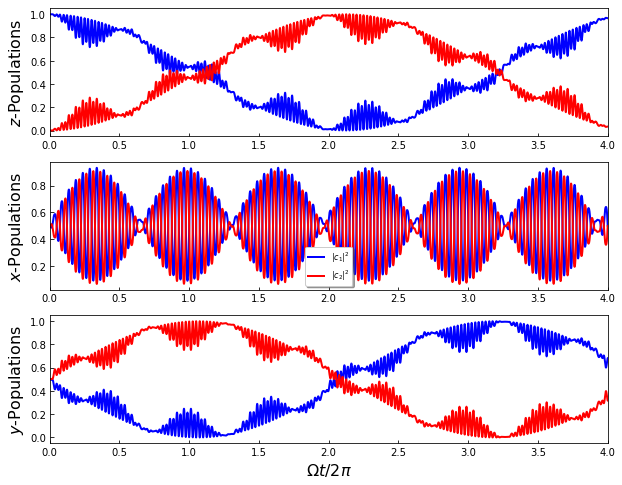

In [8]:
#----- Plot Results -----
fig = plt.figure( figsize=(10,8) )
axz, axx, axy = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
fs = 16 #Label fontsize
labels = ['$|c_{1}|^2$', '$|c_{2}|^2$'] #Plot labels

#--- Draw Plots ---
#Bare spins
axz.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[0], 'b-', lw=2, label=labels[0]) 
axz.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[1], 'r-', lw=2, label=labels[1])

#x-spins
axx.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[2], 'b-', lw=2, label=labels[0]) 
axx.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[3], 'r-', lw=2, label=labels[1])

#y-spins
axy.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[4], 'b-', lw=2, label=labels[0]) 
axy.plot( Psi.times*(slow_f/2/np.pi), Psi.expect[5], 'r-', lw=2, label=labels[1])

#--- Plot Settings ---
axz.set_ylabel('$z$-Populations', fontsize=fs)
axx.set_ylabel('$x$-Populations', fontsize=fs)
axy.set_ylabel('$y$-Populations', fontsize=fs)

axy.set_xlabel('$\Omega t/2\pi$', fontsize=fs) #Comman x-label
axx.legend(loc='best', fancybox=True, shadow=True, framealpha=1, fontsize=8)
for ax in axz, axx, axy:
    ax.set_xlim([0,periods]) #Remove extra spaces at ends
    ax.tick_params(direction='in') #Set grid-ticks inward
plt.show()